In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


TODO
- Furkan: clean up data entries per column
- Artem: analysis,
- Tom: analysis,

In [ ]:
import os
import csv
import pandas as pd

# Get the location of the current Colab notebook
file_path = '/content/drive/MyDrive/CSPP/CS151/CS151 Group Project/Updated Datasets/UPDATED_NM student infractions 2010-2022.csv' # Artem's path, others need to chagne

# file_path = '/content/drive/Shared with me/CS151 Group Project/Updated Datasets/UPDATED_NM student infractions 2010-2022.csv' # Shaohua's path

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(file_path, encoding='latin-1')

# Convert the DataFrame to a NumPy matrix
numpy_matrix = df.to_numpy()
# print(df)

<ipython-input-3-e5529754a803>:11: DtypeWarning: Columns (5,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, encoding='latin-1')


In [ ]:
# DATA CLEANING: remove non-used columns, remove rows with empty data points
## removing columns
colToRemove = ["Discipline Infraction","Student Hispanic Indicator","Discipline Response","Section 504 Status", "R3", "W1","W2","W4","W5","WD","WDO","WG","WC", "Admin First Name", "Admin Last Name", "Admin License Number", "Location Organization Type Code", "District Name", "Infraction Event ID"]
df_preclean = df.drop(columns=colToRemove)
print(df_preclean.columns)
# print("count: ",df_clean.count())
## removing rows with empty data points
df_clean = df_preclean.dropna()

Index(['District Code', 'School Year', 'Student Grade Level',
       'Discipline Infraction Date', 'Discipline Infraction Code',
       'Drug Related', 'Alcohol Related', 'Gang Related', 'Hate Crime',
       'Serious Injury', 'Criminal Charge Code', 'Repeat Offender',
       'Discipline Response Code', 'Discipline Response Duration',
       'Student Gender Code', 'Student Race Ethnicity Derived',
       'Special Ed Status Code', 'Gifted Participation Code', 'Immigrant',
       'Food Program Participation Code'],
      dtype='object')


In [ ]:
print("NaN present in DataFrame:", df_clean.isna().any().any())

NaN present in DataFrame: False


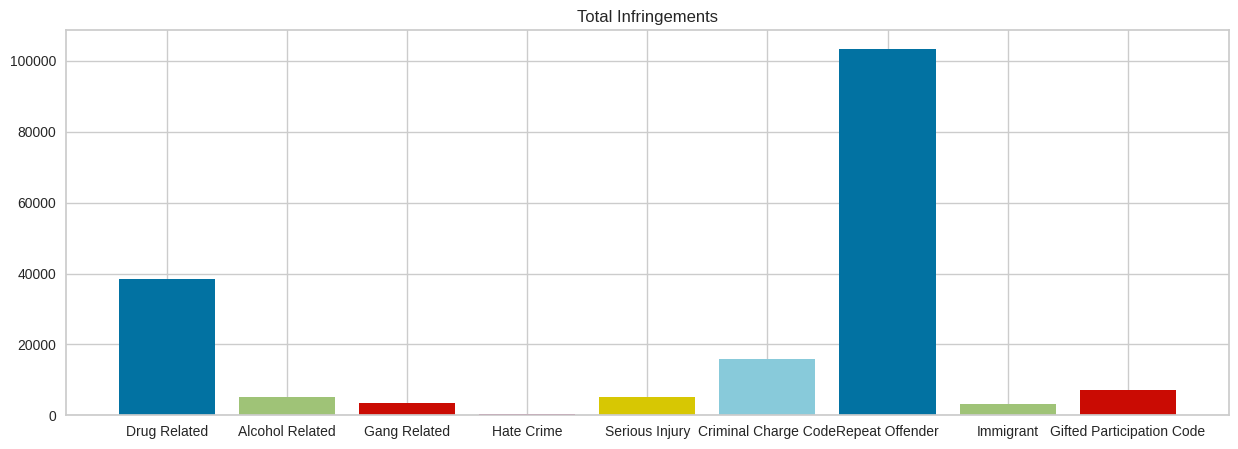

Category                     Count
-------------------------  -------
Total Categories            279842
Drug Related                 38562
Alcohol Related               5060
Gang Related                  3405
Hate Crime                     301
Serious Injury                5127
Criminal Charge Code         16003
Repeat Offender             103465
Immigrant                     3226
Gifted Participation Code     7055
====================PER CATEGORY====================
School Year
Value         Count
----------  -------
2019-06-30    35250
2017-06-30    31254
2016-06-30    30173
2020-06-30    26099
2012-06-30    24558
2014-06-30    24143
2011-06-30    23520
2013-06-30    22631
2018-06-30    22415
2022-06-30    19355
2015-06-30    18073
2021-06-30     2371

Student Grade Level
Value      Count
-------  -------
9          45569
8          45474
7          43972
6          34838
10         32605
11         19808
12         11822
5          11420
4           9123
3           7660
2         

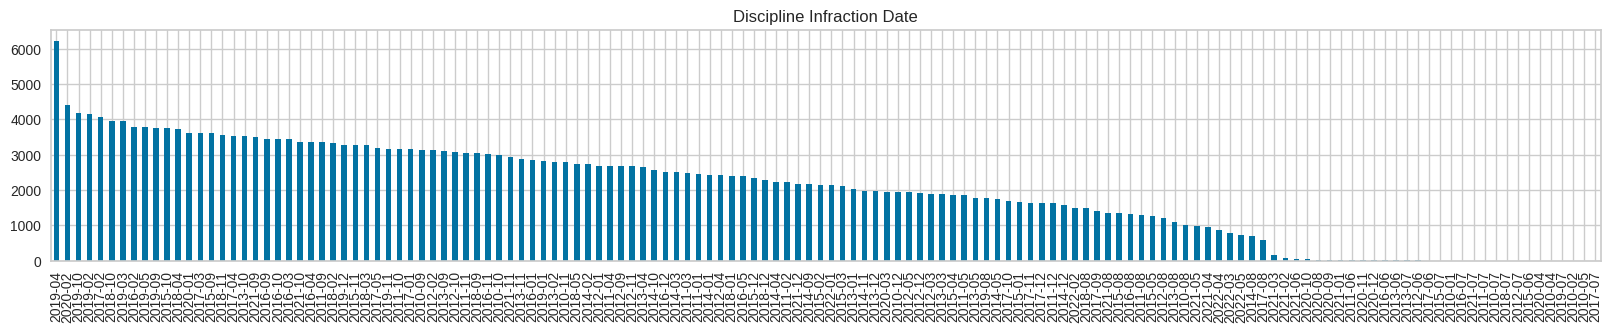

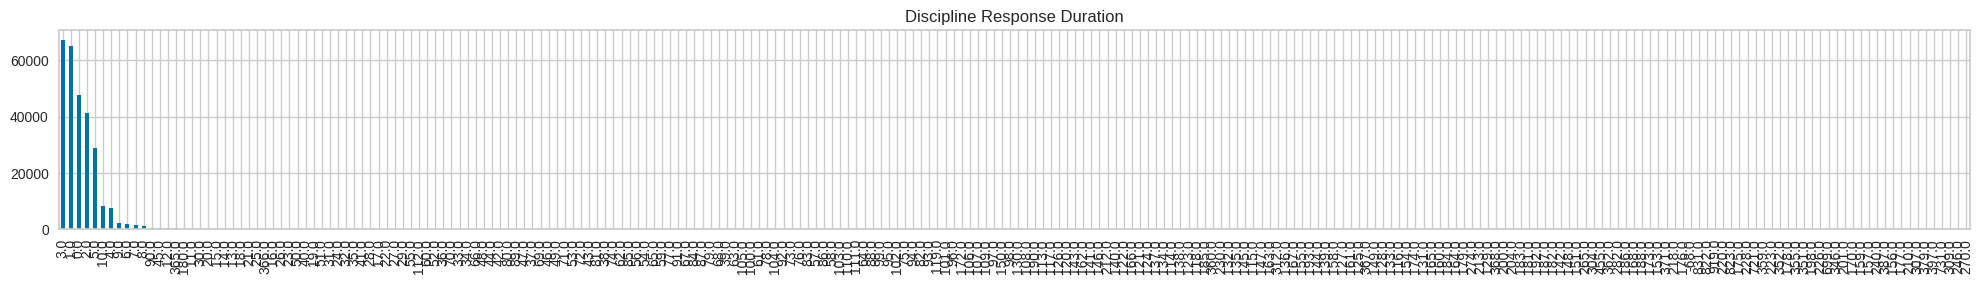

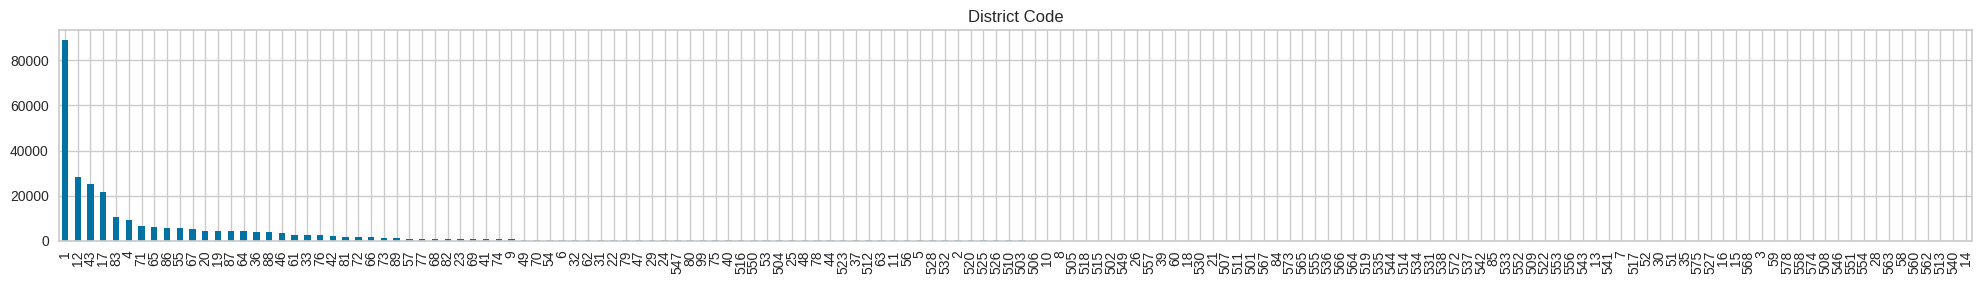

In [ ]:
# SIMPLE ANALYSIS
import matplotlib.pyplot as plt
from tabulate import tabulate
import numpy as np
# data processing
df_anal = df_clean.copy()
df_anal = df_anal.dropna()
# Convert Yes/Y and No/N to 0,1 for all
df_anal.replace({'Yes': 1, 'Y': 1, 'No': 0, 'N': 0,'0': 0}, inplace=True)

# Total infringements and bar plot
total_infringements = len(df_anal)
# Counts per category
categories = ['Drug Related', 'Alcohol Related', 'Gang Related', 'Hate Crime', 'Serious Injury',
              'Criminal Charge Code', 'Repeat Offender', 'Immigrant', 'Gifted Participation Code']
counts_list = []
plt.figure(figsize=(15, 5))
plt.title('Total Infringements')
for category in categories:
    counts = df_anal[category].sum()
    counts_list.append(counts)
    plt.bar(category, counts)
plt.show()
# print table
table_data = [[category, count] for category, count in zip(["Total Categories"]+categories, [total_infringements]+counts_list)]
# Display table
print(tabulate(table_data, headers=['Category', 'Count']))

print("====================PER CATEGORY====================")
column_cat_list = ['School Year','Student Grade Level','Discipline Infraction Code','Discipline Response Code',
                   'Student Gender Code','Student Race Ethnicity Derived','Food Program Participation Code']
# Per category
# Iterate over each column and get value counts
results_cat = []
for column in column_cat_list:
    count_series = df_anal[column].value_counts()
    results_cat.append([column, count_series.to_dict()])

# Print the table using tabulate
for result in results_cat:
    print(result[0])
    print(tabulate(result[1].items(), headers=['Value', 'Count']))
    print()

# Discipline Response Duration
average_discipline_response_duration = df_anal['Discipline Response Duration'].mean()
median_discipline_response_duration = df_anal['Discipline Response Duration'].median()
print()
print("=========================Discipline Response Duration=======================")
print('Average Discipline Response Duration:', average_discipline_response_duration)
print('Median Discipline Response Duration:', median_discipline_response_duration)
print()



print("=========================Plotting=======================")

# Bar plot for Discipline Infraction Date and Discipline Response Duration
plt.figure(figsize=(20, 3))
df_anal['Discipline Infraction Date'] = pd.to_datetime(df_anal['Discipline Infraction Date'], errors='coerce')
df_anal['Discipline Infraction Date'].dt.to_period('M').value_counts().plot(kind='bar')
plt.title('Discipline Infraction Date')

plt.figure(figsize=(20, 3))
df_anal['Discipline Response Duration'] = np.around(df_anal['Discipline Response Duration']) # rounding up
df_anal['Discipline Response Duration'].value_counts().plot(kind='bar')
plt.title('Discipline Response Duration')
plt.tight_layout()
plt.show()

plt.figure(figsize=(20, 3))
df_anal['District Code'].value_counts().plot(kind='bar')
plt.title('District Code')
plt.tight_layout()
plt.show()


# plt.figure(figsize=(10, 5))
# df_anal['Student Grade Level'].value_counts().sort_index().plot(kind='bar')
# plt.title('Student Grade Level')
# plt.tight_layout()
# plt.show()

START:  District Code                        int64
School Year                         object
Student Grade Level                 object
Discipline Infraction Date          object
Discipline Infraction Code          object
Drug Related                        object
Alcohol Related                     object
Gang Related                        object
Hate Crime                          object
Serious Injury                      object
Criminal Charge Code                object
Repeat Offender                     object
Discipline Response Code           float64
Discipline Response Duration       float64
Student Gender Code                 object
Student Race Ethnicity Derived      object
Special Ed Status Code              object
Gifted Participation Code           object
Immigrant                           object
Food Program Participation Code     object
dtype: object
District Code                                                                 int64
School Year                       

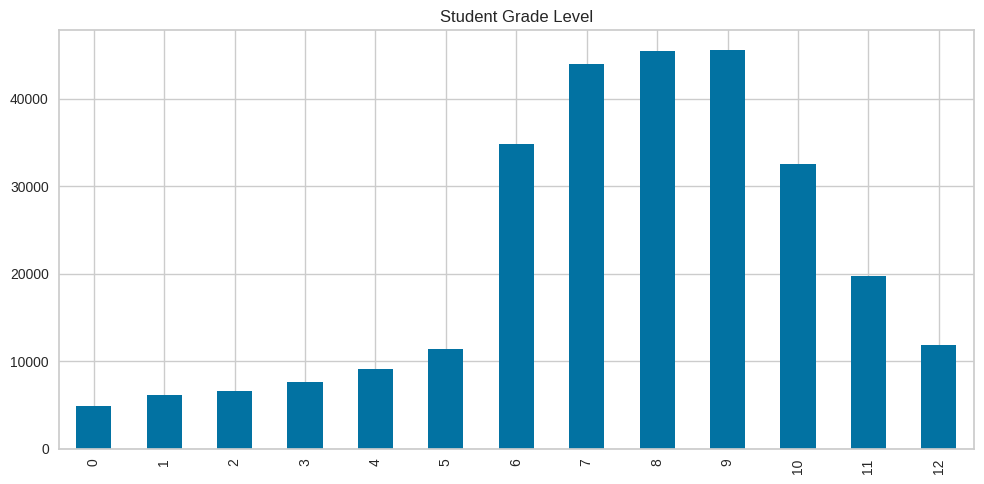

In [ ]:
# DATA PROCESSING: Correlation to Infringements (from Artem)
df_processed = df_clean.copy()
print("START: ",df_processed.dtypes)

# Student Grade Level: KF, OS, PK => 0
df_processed['Student Grade Level'].replace({'KF': 0, 'OS': 0, 'PK': 0}, inplace=True)
# School Year: only keep year
df_processed['School Year'] = pd.to_datetime(df_processed['School Year']).dt.year
# Convert Yes/Y and No/N to 0,1 for all
df_processed.replace({'Yes': 1, 'Y': 1, 'No': 0, 'N': 0,'0': 0}, inplace=True)
# Food Program Participation Code: F/R/N => 1/0.5/0
df_processed['Food Program Participation Code'].replace({'F': 1, 'R': 0.5, 'N': 0}, inplace=True)
# One Hot Encoding: Student Gender Code and Student Race Ethnicity Derived
df_processed = pd.get_dummies(df_processed, columns=['Student Gender Code', 'Student Race Ethnicity Derived'])
# Discipline Infraction Code: 55P/55U => 55, 55D => 100
df_processed['Discipline Infraction Code'] = df_processed['Discipline Infraction Code'].replace({'55P': 55, '55U': 55, '55D': 100})
# Discipline Infraction Date: break into day, month, year, and day of the week
# Extract day, month, year, and day of the week
df_processed['Discipline Infraction Date'] = pd.to_datetime(df_processed['Discipline Infraction Date'], errors='coerce')
df_processed['Infraction Day'] = df_processed['Discipline Infraction Date'].dt.day
df_processed['Infraction Month'] = df_processed['Discipline Infraction Date'].dt.month
df_processed['Infraction Year'] = df_processed['Discipline Infraction Date'].dt.year
df_processed['Infraction Day of Week'] = df_processed['Discipline Infraction Date'].dt.dayofweek
# Dropping unused columns
df_processed = df_processed.drop(columns=['Discipline Response Code', 'Discipline Infraction Date', 'Discipline Response Duration', 'Criminal Charge Code'])
# Conversion of uint8 to int64 for uniformity
for col in df_processed.columns:
    if df_processed[col].dtype == 'uint8' or df_processed[col].dtype == 'object':
        df_processed[col] = df_processed[col].astype('int64')

# Check the transformed DataFrame
print(df_processed.dtypes)
plt.figure(figsize=(10, 5))
df_processed['Student Grade Level'].value_counts().sort_index().plot(kind='bar')
plt.title('Student Grade Level')
plt.tight_layout()
plt.show()

In [ ]:
# TEST FOR NANs
print("NaN present in DataFrame:", df_processed.isna().any().any())
# Select columns containing NaN values in rows
columns_with_nan = df_processed.columns[df_processed.isna().any()]
# Filter DataFrame to include only rows with NaN values and the columns containing NaN values
rows_with_nan = df_processed[df_processed.isna().any(axis=1)][columns_with_nan]
# Print the resulting DataFrame
print(rows_with_nan)

NaN present in DataFrame: False
Empty DataFrame
Columns: []
Index: []


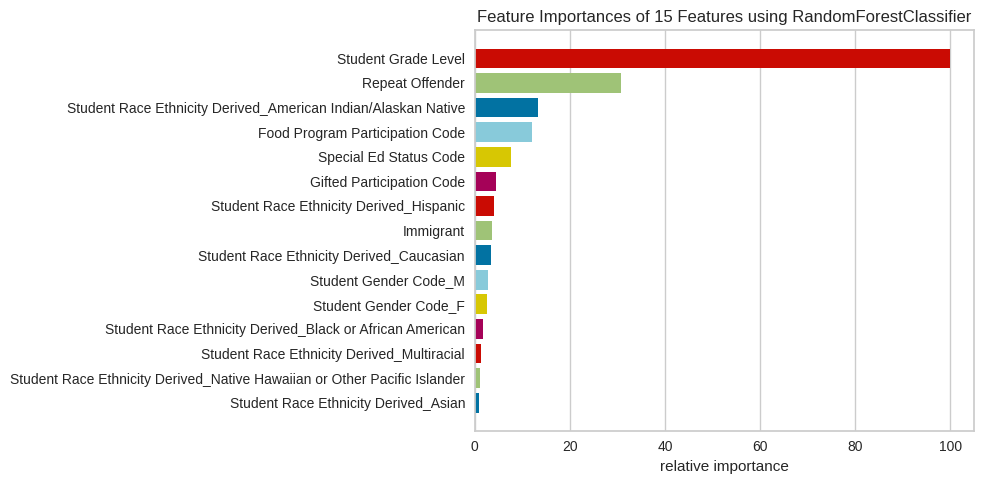

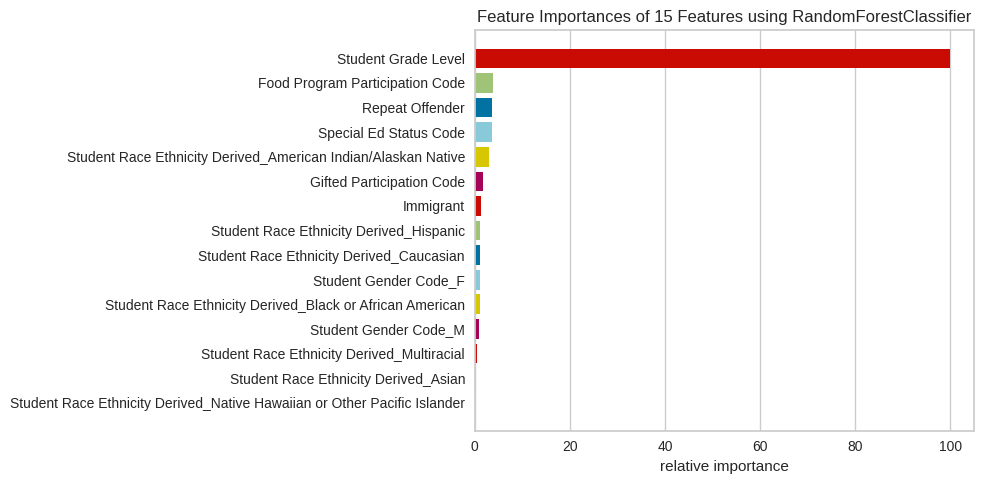

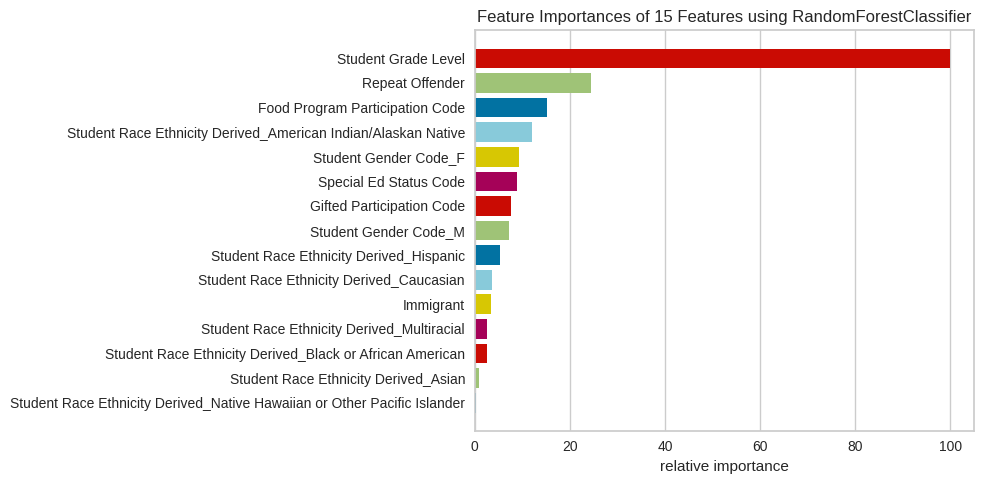

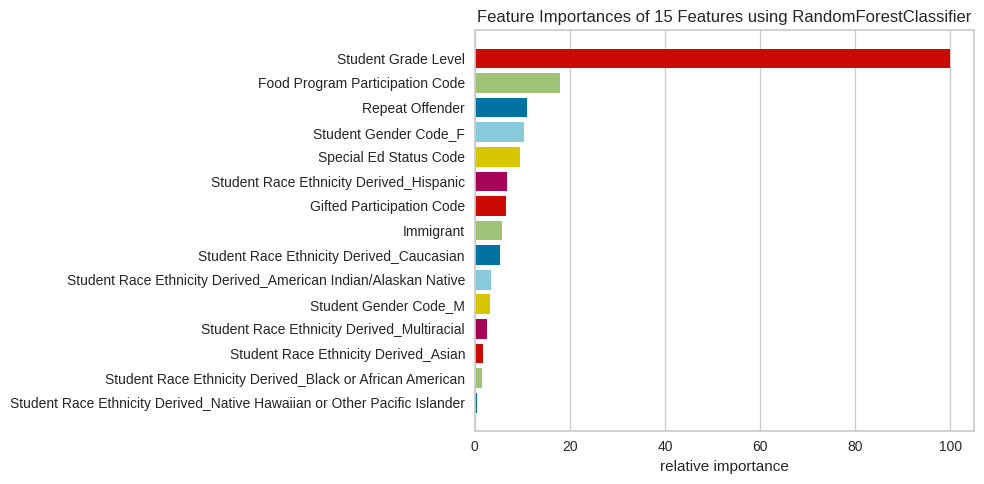

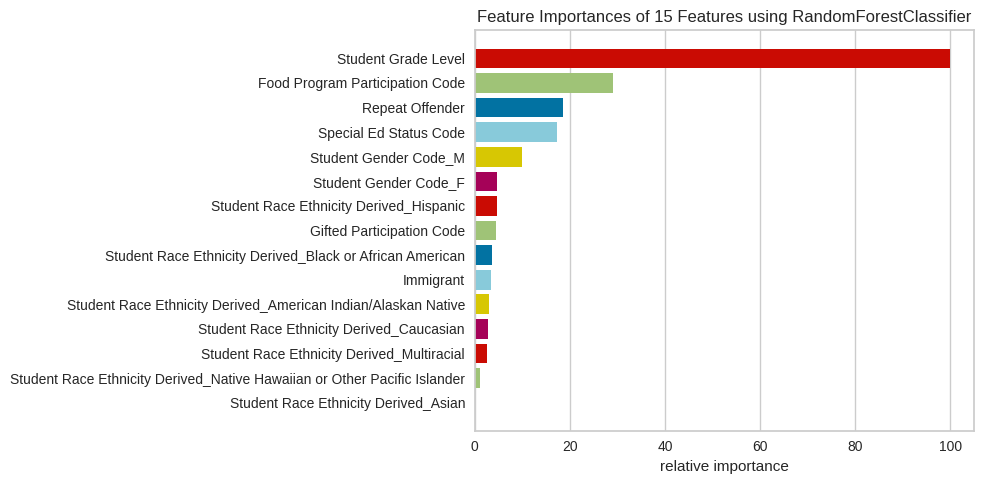

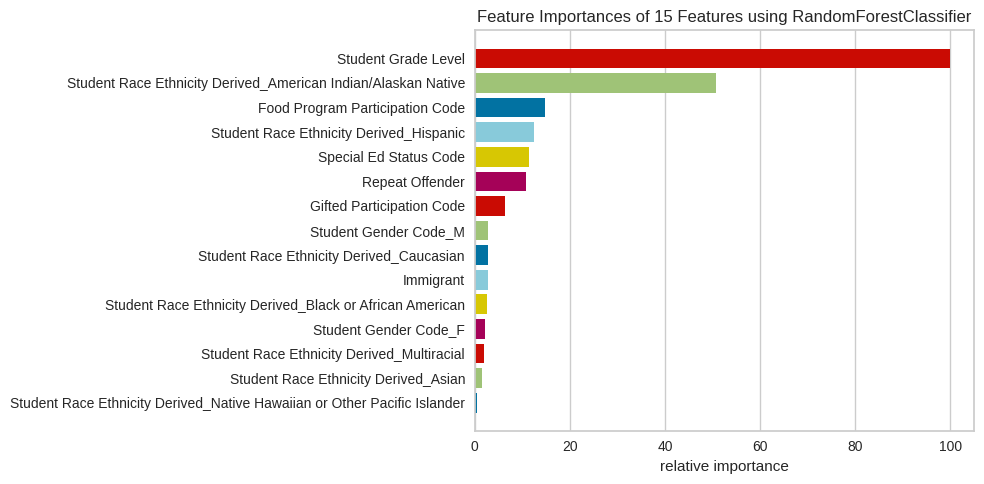

Discipline Infraction Code


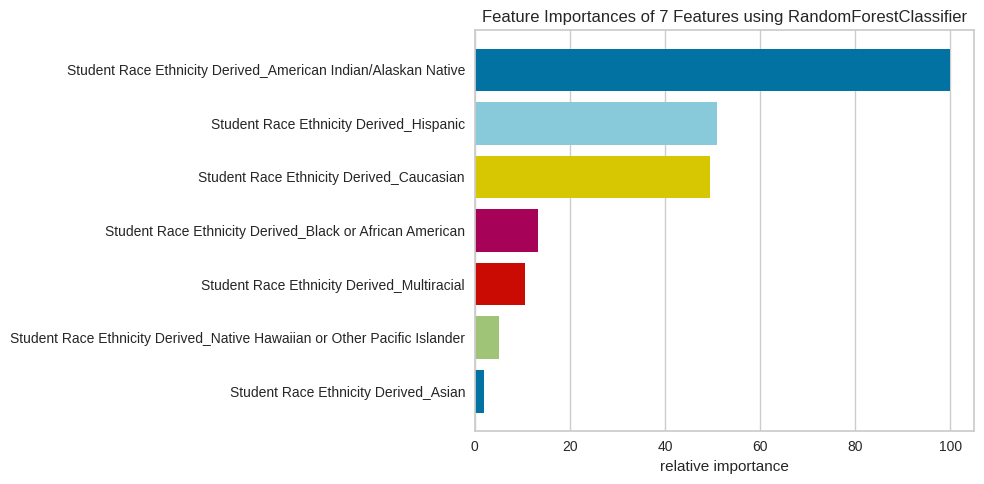

Drug Related


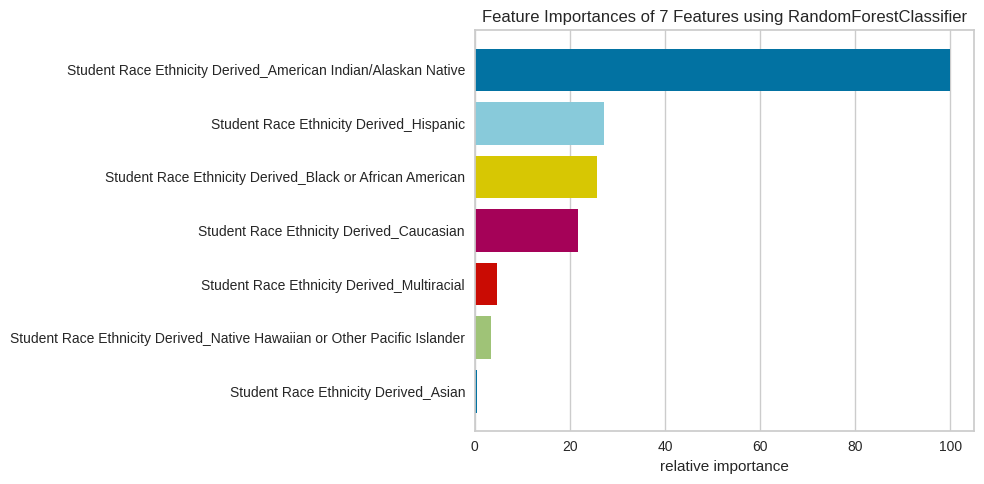

Alcohol Related


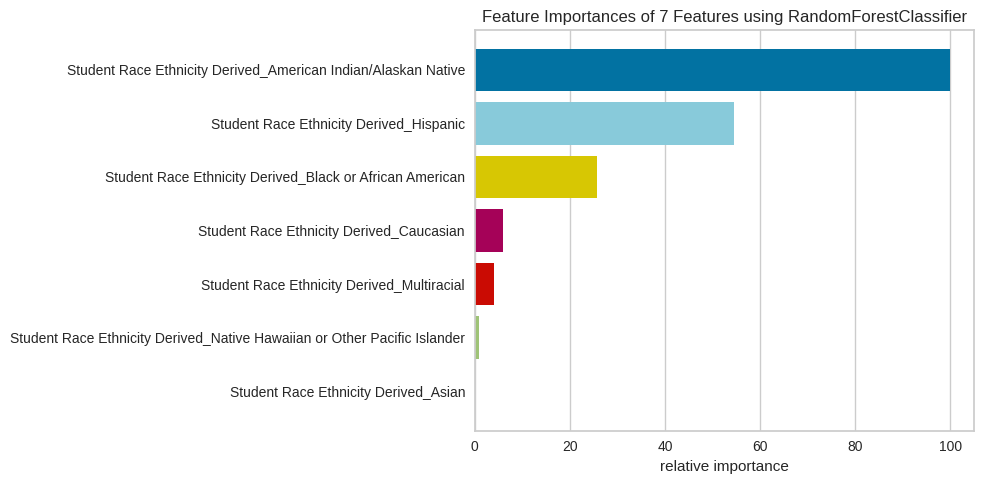

Gang Related


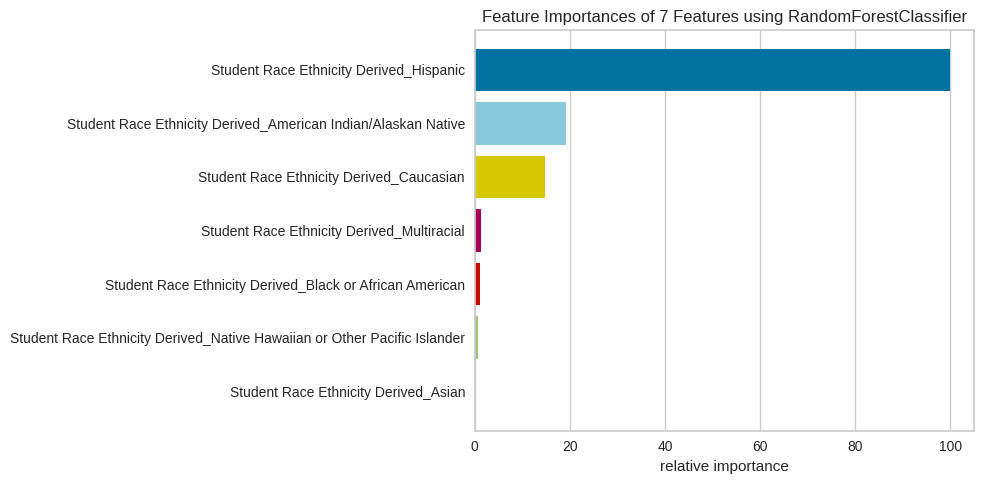

Hate Crime


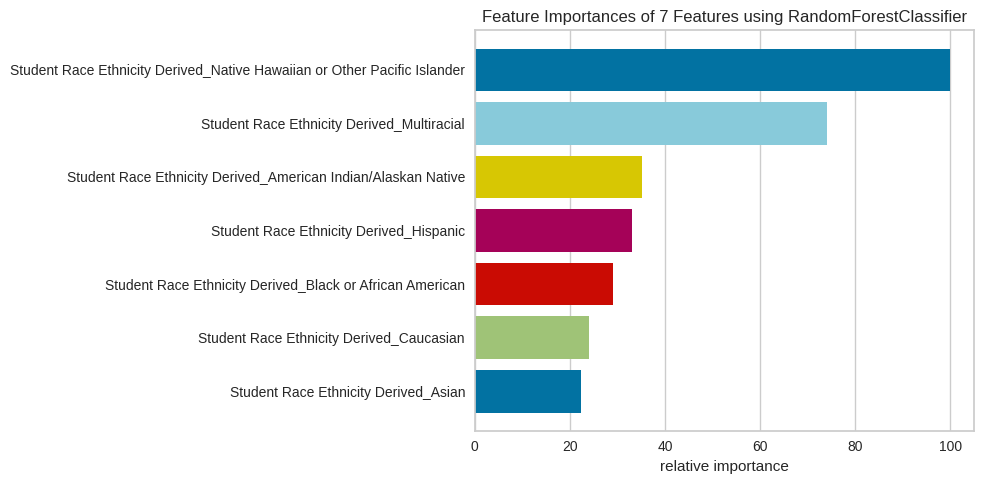

Serious Injury


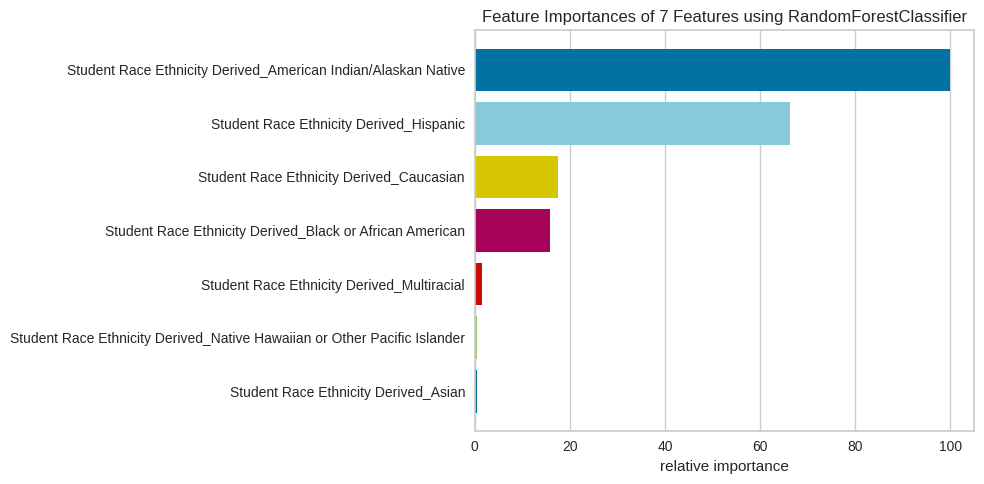

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.model_selection import FeatureImportances
import matplotlib.pyplot as plt

# making the classification data set, change target
experimentName = "Without Date and District Code"
drop_list = ["School Year","Infraction Day", "District Code", "Infraction Month", "Infraction Day of Week", "Infraction Year"] # columns to drop for analysis
# target_list = ["Discipline Infraction Code","Drug Related","Alcohol Related","Gang Related","Hate Crime","Serious njury"]
target_list = ["Discipline Infraction Code","Drug Related","Alcohol Related","Gang Related","Hate Crime","SerioIus Injury"]

X = df_processed.drop(target_list+drop_list, axis=1)
for target in target_list:
  y = df_processed[target]

  plt.figure(figsize=(10, 5))
  plt.title('Feature Importance using RandomForestClassifier: '+ experimentName + ", type: " + target)
  model = RandomForestClassifier(n_estimators=10)
  viz = FeatureImportances(model)
  viz.fit(X, y)
  viz.show()


# ONLY RACE
experimentName = "ONLY RACE"
X = df_processed[[col for col in df_processed.columns if 'Ethnicity' in col]]
for target in target_list:
  y = df_processed[target]
  print(target)
  plt.figure(figsize=(10, 5))
  plt.title('Feature Importance using RandomForestClassifier: '+ experimentName + ", type: " + target)
  model = RandomForestClassifier(n_estimators=10)
  viz = FeatureImportances(model)
  viz.fit(X, y)
  viz.show()